Steps to perform:
Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:

1.     Feature Transformation

●	Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors in the dataset.

3.     Additional Feature Engineering

●	You will check the correlation between features and drop those features that have a strong correlation.
●	This will help reduce the number of features and leave you with the most relevant features.

4.     Modeling

●	After applying EDA and feature engineering, you are now ready to build the predictive models.
●	In this part, you will create a deep learning model using Keras with Tensorflow backend.


In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
print('imported')

imported


In [2]:
url = 'https://raw.githubusercontent.com/tksundar/lending_club/refs/heads/master/loan_data.csv'
data=pd.read_csv(url)
print('data loaded')

data loaded


In [3]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


purpose
all_other             2331
credit_card           1262
debt_consolidation    3957
educational            343
home_improvement       629
major_purchase         437
small_business         619
dtype: int64


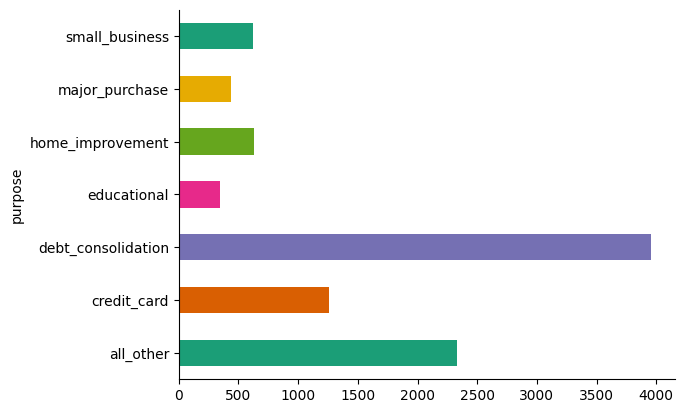

In [4]:
# @title purpose

from matplotlib import pyplot as plt
import seaborn as sns
dg = data.groupby('purpose').size()
print(dg)
dg.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

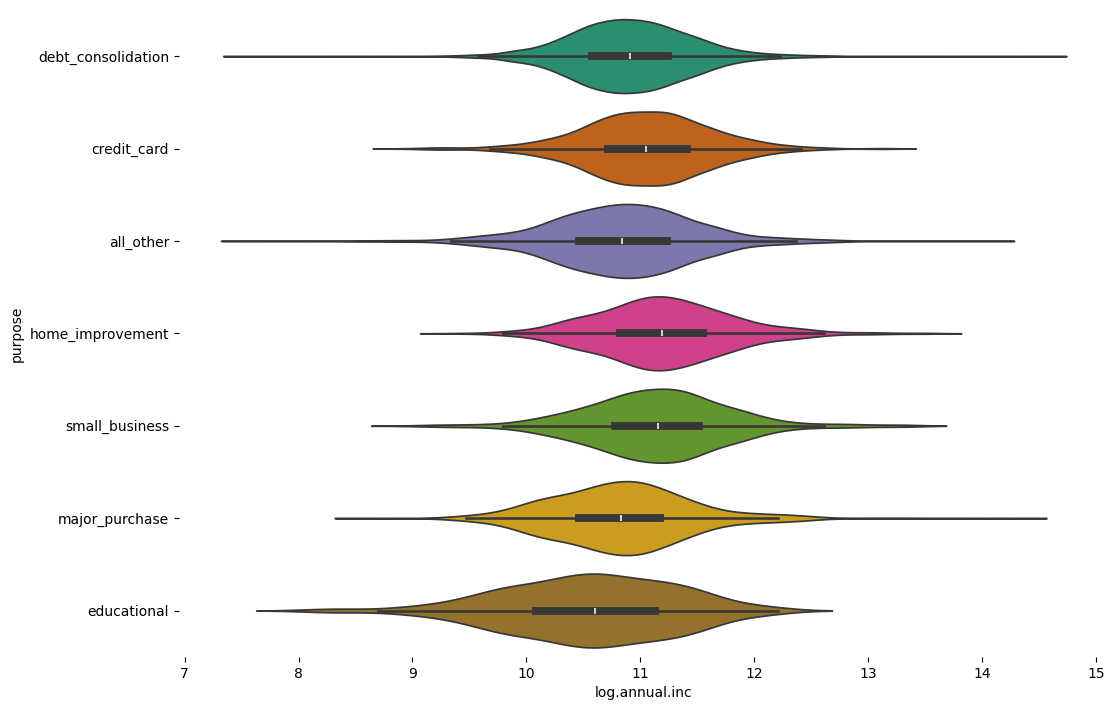

In [5]:
# @title purpose vs log.annual.inc

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['purpose'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='log.annual.inc', y='purpose', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
data.isnull().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [8]:
data['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533


<Axes: >

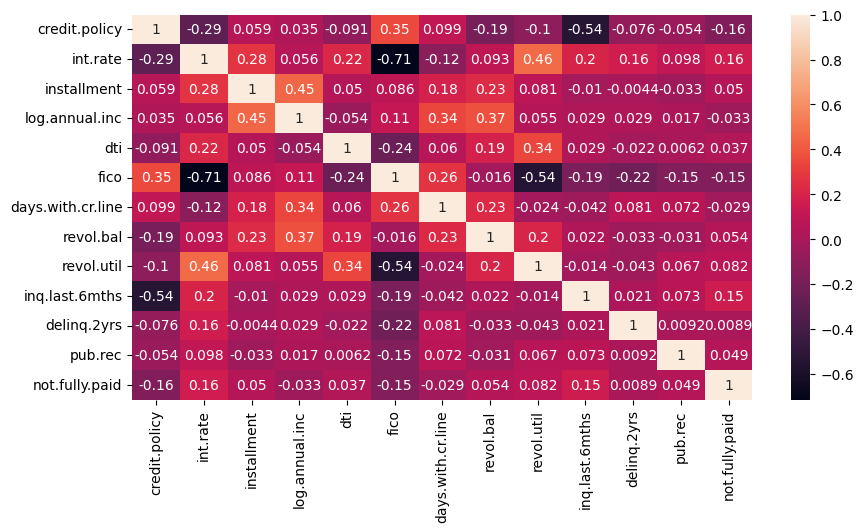

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [10]:
# handle imbalance data
no_fully_paid_0=data[data['not.fully.paid']==0]
no_fully_paid_1=data[data['not.fully.paid']==1]

In [11]:
print(no_fully_paid_0.shape)
print(no_fully_paid_1.shape)

(8045, 14)
(1533, 14)


In [12]:
# resample oversampling
from sklearn.utils import resample
no_fully_paid_1_upsampled=resample(no_fully_paid_1,replace=True,n_samples=len(no_fully_paid_0),random_state=42)
new_df=pd.concat([no_fully_paid_0,no_fully_paid_1_upsampled])
new_df['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,8045


In [13]:
# shuffle the data
from sklearn.utils import shuffle
new_df=shuffle(new_df)
new_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7563,1,debt_consolidation,0.1607,299.15,10.367222,23.07,672,1489.000000,9640,87.6,0,0,0,1
6941,1,debt_consolidation,0.0774,62.44,10.616437,6.06,737,8940.041667,37804,21.4,1,0,0,0
956,1,debt_consolidation,0.1292,252.42,10.985293,18.81,672,3889.000000,12195,58.9,3,0,1,1
2054,1,small_business,0.1600,281.26,10.596635,23.13,662,3090.041667,31006,85.4,3,0,0,0
8722,0,educational,0.1349,42.42,9.798127,4.67,652,869.958333,1157,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,all_other,0.0712,92.80,11.012050,1.19,797,6270.041667,2907,4.0,0,0,0,0
2598,1,debt_consolidation,0.1253,435.07,11.082204,17.11,712,5010.000000,13407,44.8,0,0,0,0
8604,0,credit_card,0.1418,102.80,10.404263,22.79,657,1650.000000,7958,106.1,0,0,0,0
9253,0,all_other,0.1461,379.23,10.126631,10.03,677,1860.000000,8245,33.1,4,0,0,1


In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16090 entries, 7563 to 8282
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      16090 non-null  int64  
 1   purpose            16090 non-null  object 
 2   int.rate           16090 non-null  float64
 3   installment        16090 non-null  float64
 4   log.annual.inc     16090 non-null  float64
 5   dti                16090 non-null  float64
 6   fico               16090 non-null  int64  
 7   days.with.cr.line  16090 non-null  float64
 8   revol.bal          16090 non-null  int64  
 9   revol.util         16090 non-null  float64
 10  inq.last.6mths     16090 non-null  int64  
 11  delinq.2yrs        16090 non-null  int64  
 12  pub.rec            16090 non-null  int64  
 13  not.fully.paid     16090 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.8+ MB


In [15]:
# apply label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df['purpose']=le.fit_transform(new_df['purpose'])

# Feature Engineering

<Axes: >

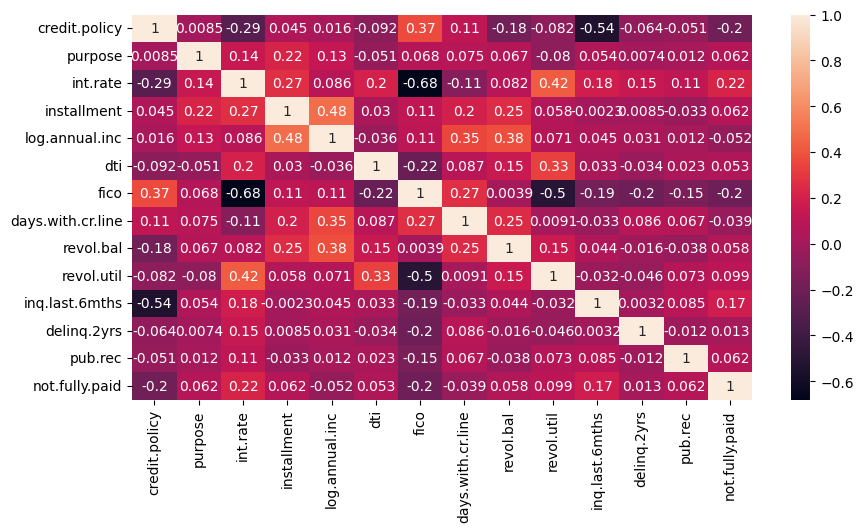

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(new_df.corr(numeric_only=True),annot=True)

In [17]:
corr_df= pd.DataFrame(new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)).reset_index()
corr_df.columns=['feature','corr']
corr_df

,feature,corr
0,not.fully.paid,1.000000
1,int.rate,0.217902
2,fico,0.204825
3,credit.policy,0.200215
4,inq.last.6mths,0.173274
5,revol.util,0.099233
6,installment,0.062145
7,pub.rec,0.061974
8,purpose,0.061968
9,revol.bal,0.058189


In [18]:
# we will choose the features which has a correlation of greater than 0.06
# corr_df[corr_df['corr']>0.06]
corr_df = corr_df[corr_df['corr']>0.06]
columns = corr_df['feature'].values
columns

array(['not.fully.paid', 'int.rate', 'fico', 'credit.policy',
       'inq.last.6mths', 'revol.util', 'installment', 'pub.rec',
       'purpose'], dtype=object)

In [19]:
new_df = new_df[columns]
X = new_df.drop('not.fully.paid',axis=1)
y = new_df['not.fully.paid']

In [20]:
X.shape


(16090, 8)

In [21]:
y.shape

(16090,)

In [22]:
# create splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
# Apply std scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
X_train

array([[ 1.61275501,  1.52679602, -1.72525983, ...,  2.62338368,
        -0.26716256,  2.23741827],
       [ 0.99817662, -0.79033113,  0.57962284, ...,  1.06755348,
        -0.26716256, -0.0122779 ],
       [-0.01362926, -0.79033113, -1.72525983, ..., -0.90513271,
        -0.26716256, -0.0122779 ],
       ...,
       [-0.96172886, -0.10882314,  0.57962284, ..., -1.13843962,
        -0.26716256, -0.0122779 ],
       [ 0.99817662, -1.06293433, -1.72525983, ..., -0.23128004,
        -0.26716256, -0.0122779 ],
       [ 0.47728396, -0.51772794, -1.72525983, ...,  0.8577498 ,
        -0.26716256, -1.13712599]])

# Create ANN using keras & tf

1. Create Architecture

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
# l2 regularizer
from tensorflow.keras.regularizers import l2
print('imported')

imported


In [26]:
X_train.shape[1]

8

In [27]:
from tensorflow import keras
model=Sequential()
# this will eliminate UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
inputs = keras.Input(shape=(X_train.shape[1],))
model.add(inputs)
# add first hidden layer
model.add(Dense(units=19,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# add scond hidden layer
model.add(Dense(units=15,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# third hidden layer
model.add(Dense(units=10,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# output
model.add(Dense(1,activation='sigmoid'))
print('model created')

model created


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 19)                  │             171 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 19)                  │              76 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15)                  │              60 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 818 (3.20 KB)

 Trainable params: 730 (2.85 KB)

 Non-trainable params: 88 (352.00 B)

In [29]:
# model compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print('model compiled')

model compiled


##Train the model

In [30]:
# set up early stopping and model checkpoint call backs and train the model.
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=10,min_delta=0.01)
checkpoint=ModelCheckpoint('best_model.keras',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)
history=model.fit(X_train,y_train,
                  epochs=50,batch_size=128,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stop,checkpoint])

Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5240 - loss: 0.8964
Epoch 1: val_accuracy improved from -inf to 0.58546, saving model to best_model.keras
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5241 - loss: 0.8959 - val_accuracy: 0.5855 - val_loss: 0.7156
Epoch 2/50
 80/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5549 - loss: 0.7719
Epoch 2: val_accuracy improved from 0.58546 to 0.60410, saving model to best_model.keras
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5555 - loss: 0.7707 - val_accuracy: 0.6041 - val_loss: 0.7011
Epoch 3/50
 82/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5545 - loss: 0.7501
Epoch 3: val_accuracy improved from 0.60410 to 0.61125, saving model to best_model.keras
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5560 - loss: 0.7483 - val_accuracy: 0.6112 - val_loss: 0.6918
Epoch 4/50
 99/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5636 - loss: 0.7323
Epoch 4: val_accuracy improved from 0.611

##Print the scores

In [31]:
# print test score
score=model.evaluate(X_test,y_test)
print(f'test loss {score[0]:.4f}')
print(f'test accuracy {score[1]:4f}')
score=model.evaluate(X_train,y_train)
print(f'train loss {score[0]:.4f}')
print(f'train accuracy {score[1]:4f}')

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6247 - loss: 0.6698
test loss 0.6716
test accuracy 0.624612
403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6208 - loss: 0.6701
train loss 0.6685
train accuracy 0.624922


##Plot Accuracy and Loass curves

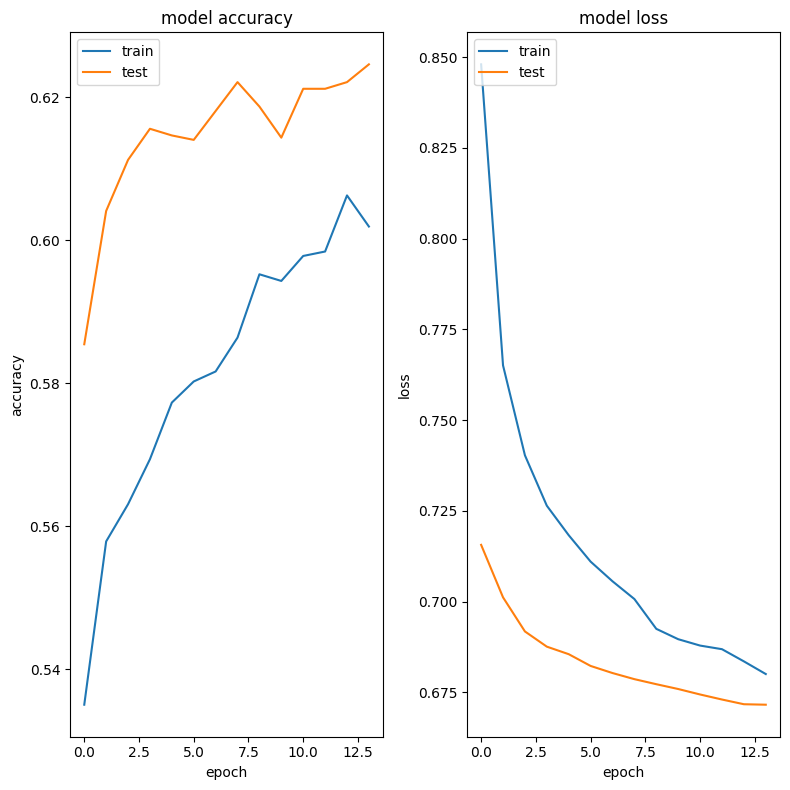

In [32]:
# plot accuracy
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.tight_layout()
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
import tensorflow as tf
def get_metrics(model,X_test):
  predictions = model.predict(X_test)
  score = tf.nn.sigmoid(predictions).numpy()
  y_pred = []
  y_pred_proba = []
  for i in range(len(score)):
    y_pred_proba.append(score[i])
    if score[i] > 0.62:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred,y_pred_proba

##Display Confusion Matrix

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix

[[1039  555]
 [ 678  946]]
Confusion Matrix Displayed



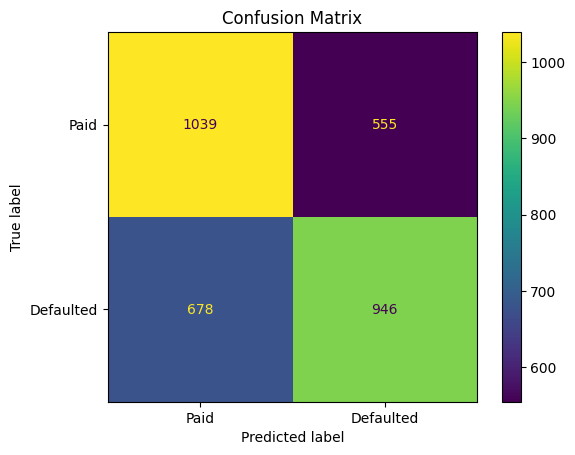

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      1594
           1       0.63      0.58      0.61      1624

    accuracy                           0.62      3218
   macro avg       0.62      0.62      0.62      3218
weighted avg       0.62      0.62      0.62      3218



In [42]:

def display_cm(cm):
  print('Confusion Matrix\n')
  print(cm)
  print('Confusion Matrix Displayed\n')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paid','Defaulted'])
  disp.plot()
  plt.title('Confusion Matrix')
  plt.show()
  cl_report = classification_report(y_test,y_pred)
  print('Classification Report:')
  print(cl_report)
y_pred,y_pred_proba = get_metrics(model,X_test)
cm = confusion_matrix(y_test,y_pred)
display_cm(cm)


##Plot ROC Curve

auc = 0.6697442611146478



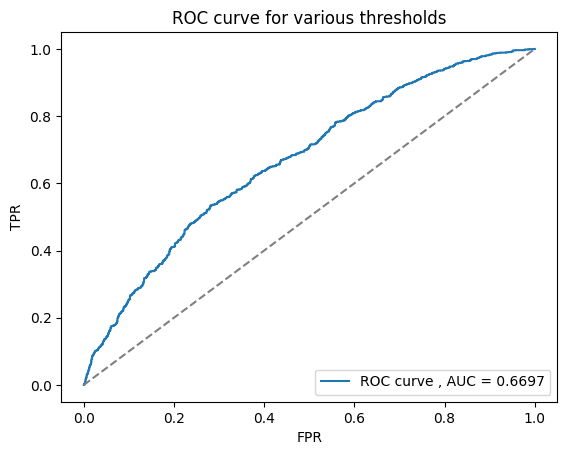

In [43]:
#ROC
from sklearn.metrics import roc_curve,auc
def plot_roc(y_test,y_pred_proba):
  fpr,tpr,threshold = roc_curve(y_test, y_pred_proba)
  area_under_curve = auc(fpr,tpr)
  print('auc = {}\n'.format(area_under_curve))
  plt.plot(fpr,tpr,label=f'ROC curve , AUC = {area_under_curve:.4f}')
  plt.plot([0,1],[0,1],linestyle='--',color='gray')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  title_ = 'ROC curve for various thresholds'
  plt.title(title_)
  plt.legend(loc = 'lower right')
  plt.show()
plot_roc(y_test,y_pred_proba)

# Apply Random Forest Classifier for comparison

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.958980733374767


confusion matrix
 [[1482  112]
 [  20 1604]]


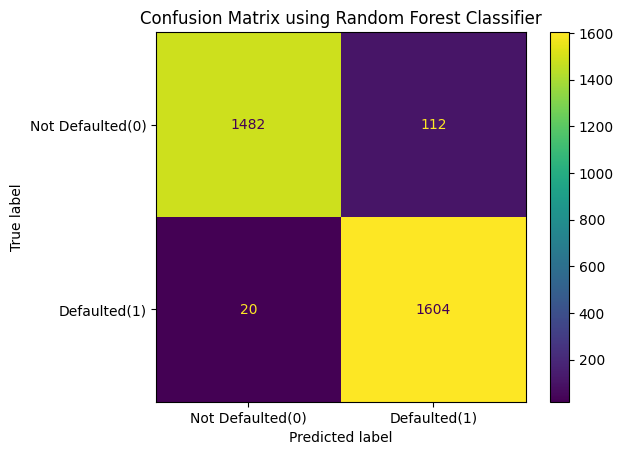

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1594
           1       0.93      0.99      0.96      1624

    accuracy                           0.96      3218
   macro avg       0.96      0.96      0.96      3218
weighted avg       0.96      0.96      0.96      3218



In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix\n',cm)
display_labels = ['Not Defaulted(0)','Defaulted(1)']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display_labels)
disp.plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()
print('Classification Report:')
print(classification_report(y_test,y_pred))

auc = 0.9923240090610727



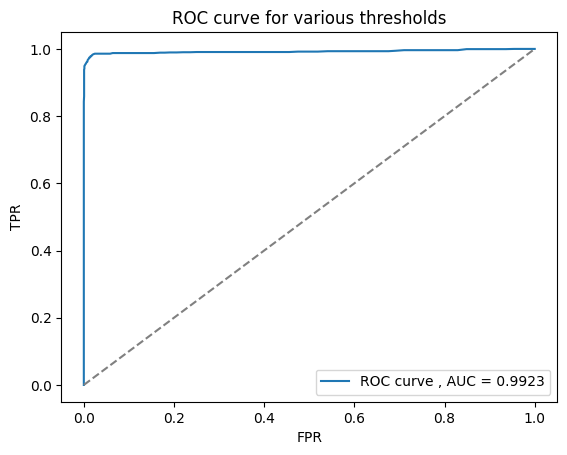

In [52]:
#ROC
from sklearn.metrics import roc_curve,auc

y_pred_test_prob = rf.predict_proba(X_test)
y_pred_proba=y_pred_test_prob[:,1]
fpr,tpr,threshold = roc_curve(y_test, y_pred_proba)
area_under_curve = auc(fpr,tpr)
print('auc = {}\n'.format(area_under_curve))
plt.plot(fpr,tpr,label=f'ROC curve , AUC = {area_under_curve:.4f}')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
title_ = 'ROC curve for various thresholds'
plt.title(title_)
plt.legend(loc = 'lower right')
plt.show()

**Conclusion**

For structured input data , Classical ML models outperforms deep learning models

Note: The dataset contains an input.csv. This , I think was meant for prediction. However, the columns are not labelled and do not match the columns in the training data. Though some columns can be guessed, many columns can not be guessed relaibly. 